In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [2]:
data = pd.read_csv('marketing_sales_data.csv')
data.head()

,TV,Radio,Social Media,Influencer,Sales
0,Low,3.518070,2.293790,Micro,55.261284
1,Low,7.756876,2.572287,Mega,67.574904
2,High,20.348988,1.227180,Micro,272.250108
3,Medium,20.108487,2.728374,Mega,195.102176
4,High,31.653200,7.776978,Nano,273.960377


In [20]:
print(data.groupby('TV')['Sales'].mean())
print(data.groupby('Influencer')['Sales'].mean())

TV
High      300.853195
Low        90.984101
Medium    195.358032
Name: Sales, dtype: float64
Influencer
Macro    181.670070
Mega     194.487941
Micro    188.321846
Nano     191.874432
Name: Sales, dtype: float64


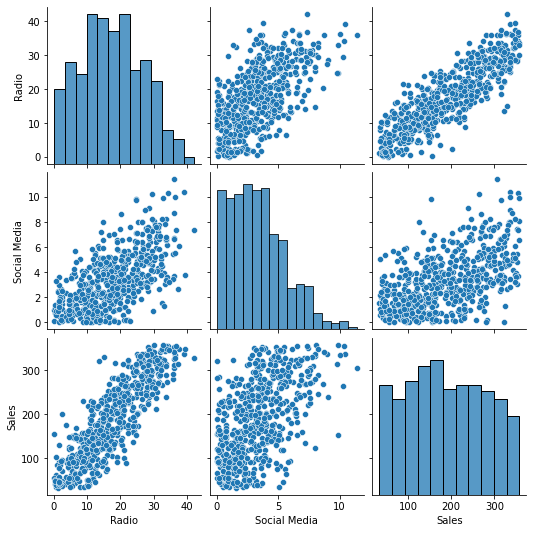

In [17]:
sns.pairplot(data)

In [3]:
#exploratory data analysis before constructing a linear regression model?

#To understand which variables are present in the data
#To consider the distribution of features, such as minimum, mean, and maximum values
#To plot the relationship between the independent and dependent variables and visualize which features have a linear relationship
#To identify issues with the data, such as incorrect or missing values.

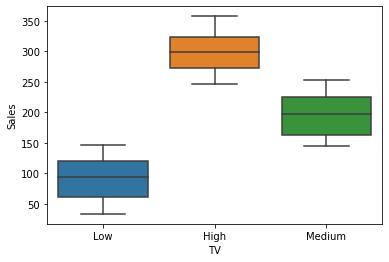

In [4]:
#********************Data exploration******************************
sns.boxplot(x = "TV", y = "Sales", data = data);

In [5]:
#There is considerable variation in `Sales` across the `TV` groups. 
#The significance of these differences can be tested with a one-way ANOVA.

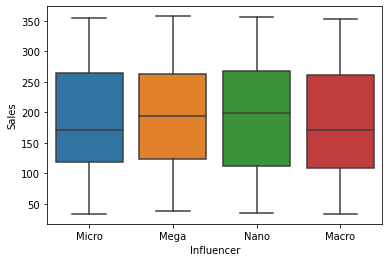

In [9]:
sns.boxplot(x = "Influencer", y = "Sales", data = data);

In [13]:
#Remove missing data
print(data.isnull().sum())
data = data.dropna(axis=0)

data.isnull().sum(axis=0)

TV              0
Radio           0
Social Media    0
Influencer      0
Sales           0
dtype: int64


TV              0
Radio           0
Social Media    0
Influencer      0
Sales           0
dtype: int64

In [14]:
#Model building

In [15]:
ols_formula= 'Sales ~ C(TV)'

In [16]:
OLS=ols(formula=ols_formula, data=data)
model=OLS.fit()
model_result=model.summary()
model_result

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     1918.
Date:                Mon, 04 Mar 2024   Prob (F-statistic):          1.38e-253
Time:                        22:50:57   Log-Likelihood:                -2798.9
No. Observations:                 572   AIC:                             5604.
Df Residuals:                     569   BIC:                             5617.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         300.8532      2.512    119.789      0.000     295.920     305.786
C(TV)[T.Low]     -209.8691      3.394    -61.841      0.000    -216.535    -203.203
C(TV)[T.Medium]  -105.4952      3.379    -31.224      0.000    -112.131     -98.859
==============================================================================
Omnibus:                      547.584   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.103
Skew:                           0.015   Prob(JB):                     8.77e-09
Kurtosis:                       1.753   Cond. No.                         3.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
#TV was selected as the preceding analysis showed a strong relationship between the `TV` promotion budget and the average `Sales`.
#Influencer was not selected because it did not show a strong relationship to `Sales` in the analysis.

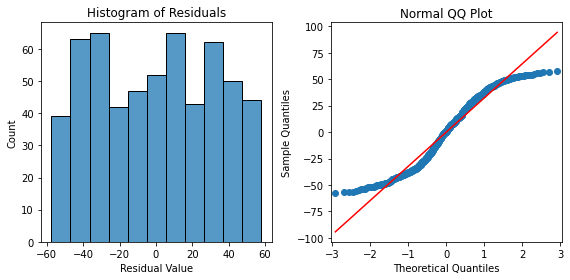

In [19]:
residuals = model.resid

fig, axes = plt.subplots(1, 2, figsize = (8,4))

sns.histplot(residuals, ax=axes[0])

axes[0].set_xlabel("Residual Value")

axes[0].set_title("Histogram of Residuals")

sm.qqplot(residuals, line='s',ax = axes[1])

axes[1].set_title("Normal QQ Plot")

plt.tight_layout()

plt.show()

In [21]:
# the normality assumption is not met when TV is used as the independent variable predicting Sales. 
#The normal q-q forms an 'S' that deviates off the red diagonal line, which is not desired behavior.

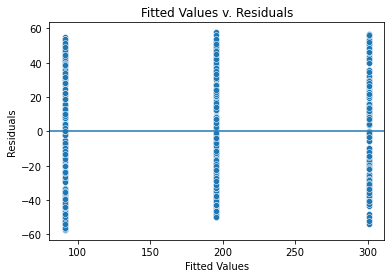

In [22]:
# Create a scatter plot with the fitted values from the model and the residuals.

fig = sns.scatterplot(x = model.fittedvalues, y = model.resid)
fig.set_xlabel("Fitted Values")
fig.set_ylabel("Residuals")
fig.set_title("Fitted Values v. Residuals")

fig.axhline(0)
plt.show()

In [23]:
#onstant variance (homoscedasticity) assumption
#The variance where there are fitted values is similarly distributed, validating that the constant variance assumption is met.


In [25]:
#Results and evaluation
model_result

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     1918.
Date:                Mon, 04 Mar 2024   Prob (F-statistic):          1.38e-253
Time:                        22:50:57   Log-Likelihood:                -2798.9
No. Observations:                 572   AIC:                             5604.
Df Residuals:                     569   BIC:                             5617.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         300.8532      2.512    119.789      0.000     295.920     305.786
C(TV)[T.Low]     -209.8691      3.394    -61.841      0.000    -216.535    -203.203
C(TV)[T.Medium]  -105.4952      3.379    -31.224      0.000    -112.131     -98.859
==============================================================================
Omnibus:                      547.584   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.103
Skew:                           0.015   Prob(JB):                     8.77e-09
Kurtosis:                       1.753   Cond. No.                         3.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
#TV as the independent variable results in a linear regression model with  𝑅2=0.874
# In other words, the model explains  87.4% of the variation in Sales. This makes the model an effective predictor of Sales.
#The default TV category for the model is High, because there are coefficients for the other two TV categories, Medium and Low.
#According to the model, Sales with a Medium or Low TV category are lower on average than Sales with a High TV category. 
#For example, the model predicts that a Low TV promotion would be 208.813 (in millions of dollars) 
#lower in Sales on average than a High TV promotion.

#The p-value for all coefficients is  0.000
#meaning all coefficients are statistically significant at  𝑝=0.05
#The 95% confidence intervals for each coefficient should be reported when presenting results to stakeholders. 
#For instance, there is a  95% chance the interval  [−215.353,−202.274] contains the true parameter of the slope of  𝛽𝑇𝑉𝐿𝑜𝑤
#which is the estimated difference in promotion sales when a Low TV promotion is chosen instead of a High TV promotion.



#Given how accurate TV was as a predictor, the model could be improved with a more granular view of the TV promotions,
#such as additional categories or the actual TV promotion budgets.
#Further, additional variables, such as the location of the marketing campaign or the time of year, may increase model accuracy.











In [27]:
### Perform a one-way ANOVA test
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(TV),4.016116e+06,2.0,1917.749265,1.383230e-253
Residual,5.957948e+05,569.0,NaN,NaN


In [28]:
#The F-test statistic is 1971.46 and the p-value is  8.81∗10−256
 # (i.e., very small). Because the p-value is less than 0.05,
 #   would reject the null hypothesis that there is no difference in Sales based on the TV promotion budget.

#The results of the one-way ANOVA test indicate that we can reject the null hypothesis in favor of the alternative hypothesis. 
#There is a statistically significant difference in Sales among TV groups.

In [29]:
#### Perform an ANOVA post hoc test
tukey_oneway = pairwise_tukeyhsd(endog = data["Sales"], groups = data["TV"])

tukey_oneway.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
High,Low,-209.8691,0.0,-217.8438,-201.8944,True
High,Medium,-105.4952,0.0,-113.4346,-97.5557,True
Low,Medium,104.3739,0.0,96.8261,111.9218,True


In [ ]:
#The first row, which compares the High and Low TV groups, 
#indicates that you can reject the null hypothesis that there is no significant difference between the Sales of these two groups.

#You can also reject the null hypotheses for the two other pairwise comparisons that compare High to Medium and Low to Medium.

#Specifically, following are estimates for the difference between the mean sales resulting from different pairs of TV promotions, as determined by the Tukey's HSD test:

#Estimated difference between the mean sales resulting from High and Low TV promotions: $208.81 million (with 95% confidence that the exact value for this difference is between 200.99 and 216.64 million dollars).
#Estimated difference between the mean sales resulting from High and Medium TV promotions: $101.51 million (with 95% confidence that the exact value for this difference is between 93.69 and 109.32 million dollars).
#difference between the mean sales resulting from Medium and Low TV promotions: $107.31 million (with 95% confidence that the exact value for this difference is between 99.71 and 114.91 million dollars).
#The linear regression model estimating Sales from TV had an R-squared of $0.871, making it a fairly accurate estimator. The model showed a statistically significant relationship between the TV promotion budget and Sales.

#The results of the one-way ANOVA test indicate that the null hypothesis that there is no difference in Sales based on the TV promotion budget can be rejected. Through the ANOVA post hoc test, a significant difference between all pairs of TV promotions was found.

#The difference in the distribution of sales across TV promotions was determined significant by both a one-way ANOVA test and a Tukey’s HSD test.